#Arima



## Importación de librerías y datos

Por medio de nuestra libería ESIOS_contoller.py importamos nuestro último dataset de datos y lo parseamos para su uso. Sirve tanto como para Drive como jupiter.

In [67]:
import json, urllib, datetime, pickle, time
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
from keras.optimizers import *
from scipy.stats import *
from importlib.machinery import SourceFileLoader


try:
  from google.colab import drive
  drive.mount('/content/drive')
  path = '/content/drive/My Drive/TFM/Utils/ESIOS_contoller.py'
  in_colab = True
except:
  path = '../utils/ESIOS_contoller.py'
  in_colab = False
  

esios_assembler = SourceFileLoader('esios', path).load_module()

esios_controller = esios_assembler.ESIOS(in_colab)
data_consumo = esios_controller.get_data('non-secuencial')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mostrando los datos de data_total_for_non_serial.csv
(30555, 33)
________________________________________________________________________________


## Preparación de los datos

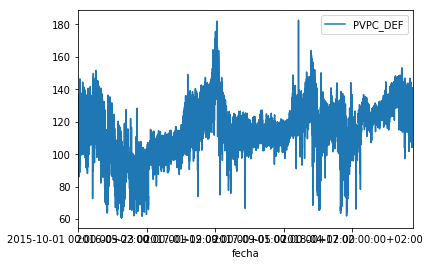

In [70]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

data = data_consumo[['fecha', 'PVPC_DEF']]
data = data.set_index('fecha')

train, test = train_test_split(data, test_size=0.2, random_state=0, shuffle=False)

train.plot()
pyplot.show()

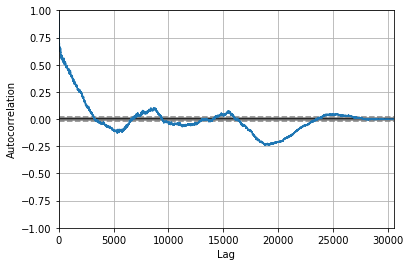

In [73]:
autocorrelation_plot(data)
pyplot.show()

## Modelo

In [74]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

model = ARIMA(np.asarray(train), order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                24443
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -67737.839
Method:                       css-mle   S.D. of innovations              3.866
Date:                Tue, 13 Aug 2019   AIC                         135489.678
Time:                        17:23:03   BIC                         135546.406
Sample:                             1   HQIC                        135508.059
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.022      0.013      0.990      -0.043       0.044
ar.L1.D.y      0.3021      0.006     47.675      0.000       0.290       0.315
ar.L2.D.y     -0.0856      0.007    -12.987      0.0

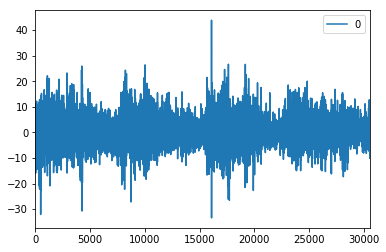

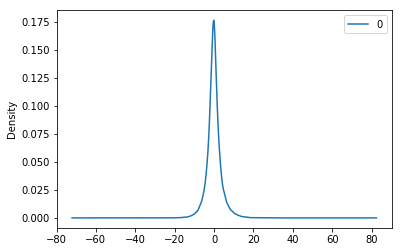

                  0
count  30554.000000
mean       0.000043
std        3.708086
min      -33.457915
25%       -1.711867
50%       -0.124375
75%        1.557002
max       43.840639


In [0]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()

print(residuals.describe())

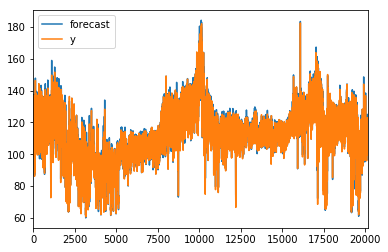

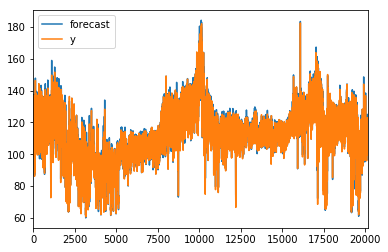

In [0]:
model_fit.plot_predict(dynamic=False)

## Auto Arima


In [0]:
!pip install -q pmdarima
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(train, start_p=1, start_q=1, test='adf',max_p=3, max_q=3,m=1, d=None, seasonal=True,   # No Seasonality
                      start_P=0, D=0, trace=True,error_action='ignore', suppress_warnings=True, stepwise=True)

print(model.summary())


     |████████████████████████████████| 921kB 1.4MB/s 
     |████████████████████████████████| 24.8MB 1.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=168111.042, BIC=168144.352, Fit time=9.661 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=255166.259, BIC=255182.913, Fit time=0.947 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=171882.982, BIC=171907.964, Fit time=2.145 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=220290.113, BIC=220315.095, Fit time=10.690 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=167874.619, BIC=167916.256, Fit time=22.750 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=167984.087, BIC=168017.396, Fit time=3.607 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=167815.582, BIC=167865.546, Fit time=50.35

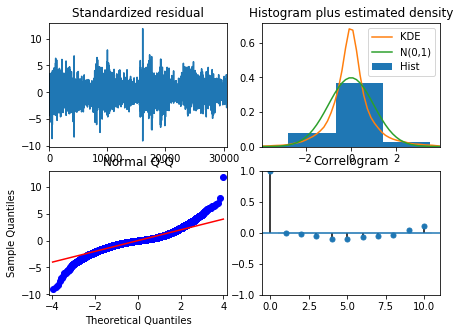

In [0]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

##  Try best model

In [0]:
model = ARIMA(np.asarray(data), order=(2,0,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                30555
Model:                     ARMA(2, 3)   Log Likelihood              -82946.567
Method:                       css-mle   S.D. of innovations              3.653
Date:                Tue, 13 Aug 2019   AIC                         165907.134
Time:                        15:46:54   BIC                         165965.425
Sample:                             0   HQIC                        165925.821
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.0545      2.426     47.431      0.000     110.300     119.809
ar.L1.y        1.7251      0.007    233.255      0.000       1.711       1.740
ar.L2.y       -0.7257      0.007    -98.822      0.0

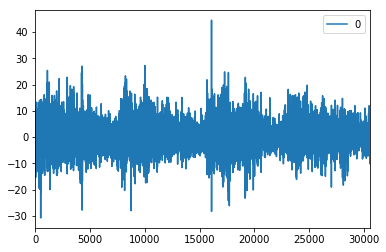

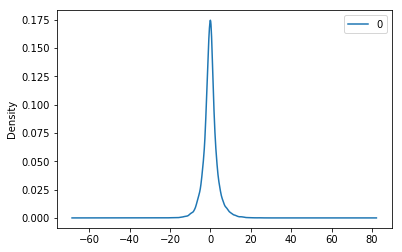

                  0
count  30555.000000
mean      -0.001396
std        3.653560
min      -30.813374
25%       -1.727244
50%       -0.088169
75%        1.536786
max       44.516017


In [0]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()

print(residuals.describe())